In [4]:
#import the important libraries for the project
import pandas as pd
import numpy as np

In [5]:
#Read and Print the EXCEL file to see the data which needs to be handled
df = pd.read_excel("/Users/danny_aka/Downloads/Data Mining/DM_FinalAssign_Gaurav_2016A2PS0582H/Data/Online Retail.xlsx")
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [6]:
#Explore the columns of the data
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
#Change the format of data and time in the data
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%Y %H:%M')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#The different areas of transaction
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [9]:
#Data Preprocessing
#Removing extra spaces in the Description
df['Description'] = df['Description'].str.strip()

In [10]:
#Check for Duplicate item in the dataset
print(f'Duplicate items in train dataset is {df.duplicated().sum()}')

Duplicate items in train dataset is 5268


In [11]:
#Remove duplicate items
df = df[~df.duplicated()]

In [11]:
#Descibing the dataset
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,536641.00,536641.00,401604.00
mean,9.62,4.63,15281.16
std,219.13,97.23,1714.01
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13939.00
50%,3.00,2.08,15145.00
75%,10.00,4.13,16784.00
max,80995.00,38970.00,18287.00


In [12]:
#Removing the negeative values from the Quantity and UnitPrice column
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,524878.00,524878.00,392692.00
mean,10.62,3.92,15287.84
std,156.28,36.09,1713.54
min,1.00,0.00,12346.00
25%,1.00,1.25,13955.00
50%,4.00,2.08,15150.00
75%,11.00,4.13,16791.00
max,80995.00,13541.33,18287.00


In [13]:
# Generate mapping of values from InvoiceID to customerID
mappingVals = {}
for i in df.itertuples():
    mappingVals[i[1]]=i[-2]

# Obtain seen values 
seenCustomerIDs = set(mappingVals.values())
seenCustomerIDs = {x for x in seenCustomerIDs if x==x}
counter = 10000

# Generate a new customerID that hasn't already been seen
def getNextCustomerID(counter):
    while counter in seenCustomerIDs:
        counter+=1
    seenCustomerIDs.add(counter)
    return counter

# Assign new values to mappingVals when the customerID is nan.
import math
for i in mappingVals:
    if math.isnan(mappingVals[i]):
        mappingVals[i] = getNextCustomerID(counter)

# Assign new data
for i,row in df.iterrows():
    df.at[i,'CustomerID'] = mappingVals[row[0]]


# Testing

#mappingVals1 = {}
#for i in df.itertuples():
    #mappingVals1[i[1]]=i[-2]

# Printing mappingvals1 shows new assigned customerID for certain InvoiceID 
#536544: 10002.0,
#536545: 10003.0,
#536546: 10004.0,
#536547: 10005.0,
#mappingVals1 

In [14]:
#Adding SellingPrice Column to generate the total revenue from each transaction
df['SalesAmount'] = df['Quantity']*df['UnitPrice']

In [15]:
#Checking the null values in data
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
SalesAmount    0
dtype: int64

In [16]:
# Data Visualization for better understanding of the cleaned data
# Importing the necessary libraries for the representation
import matplotlib.pyplot as plt
import seaborn as sns

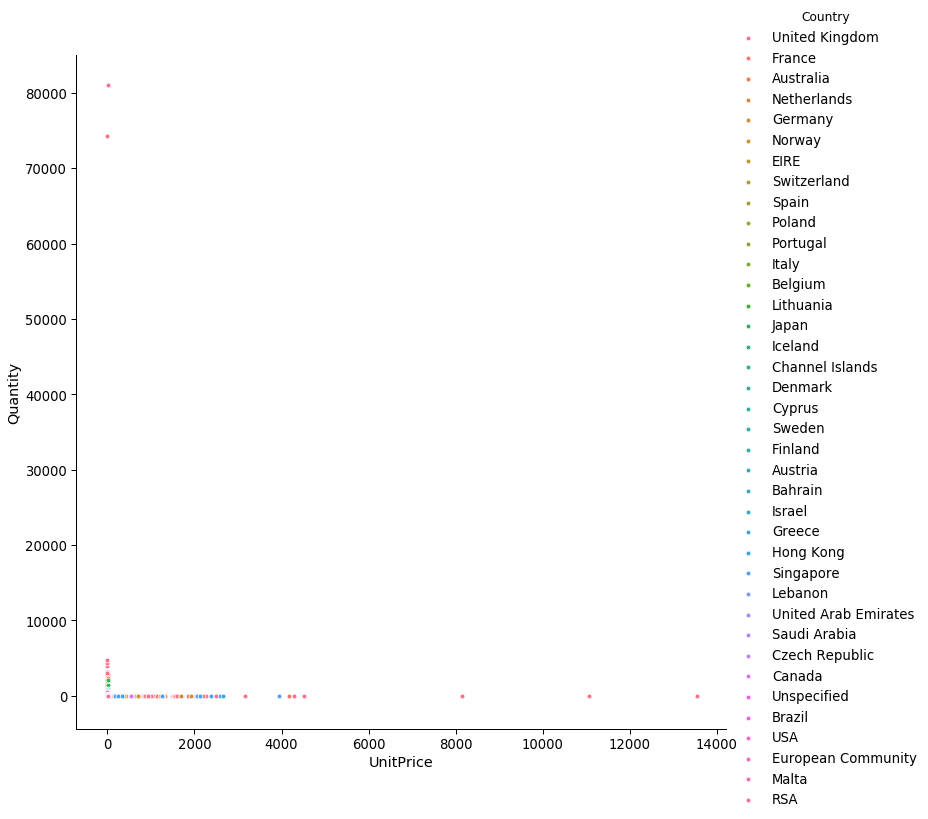

In [63]:
#Relationship between unit price and quantity
sns.pairplot(x_vars = ['UnitPrice'],y_vars=['Quantity'], hue = 'Country', data = df, height = 10);

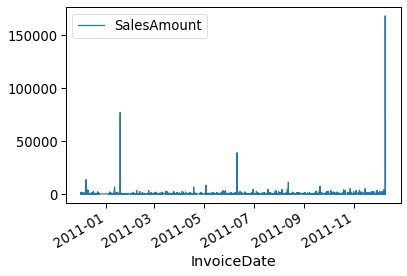

In [62]:
#Relationship between InvoiceDate and SalesAmount
df.plot(x = 'InvoiceDate', y = 'SalesAmount')

In [19]:
#Count of the appearance of countries in the data
df['Country'].value_counts()

United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon 

In [20]:
# Checking the top 10 countries in the dataset with highest transactions
df.Country.value_counts(normalize=True).head(10).mul(100).round(2).astype(str) + '%'

United Kingdom    91.45%
Germany            1.72%
France              1.6%
EIRE                1.5%
Spain              0.47%
Netherlands        0.45%
Belgium            0.39%
Switzerland        0.37%
Portugal           0.28%
Australia          0.23%
Name: Country, dtype: object

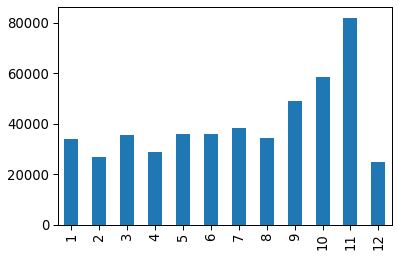

In [61]:
# Count of transaction in different months of 2011
df[df.InvoiceDate.dt.year==2011|2010].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')

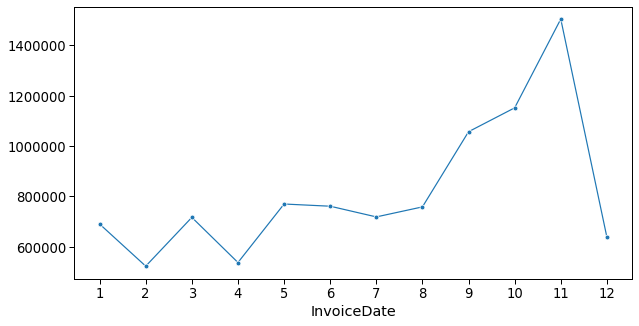

<Figure size 432x288 with 0 Axes>

In [60]:
# Visualization of the top grossing months in the data
monthly_gross = df[df.InvoiceDate.dt.year==2011].groupby(df.InvoiceDate.dt.month).SalesAmount.sum()
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o');
plt.xticks(range(1,13))
plt.show()

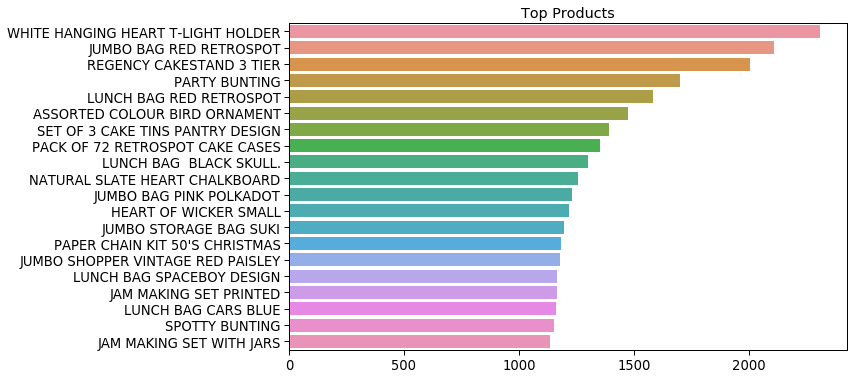

<Figure size 432x288 with 0 Axes>

In [64]:
# Visualizing some top products from the range of dataset
top_products = df['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top Products")
plt.show()

In [24]:
#Exporting Processed Data
df.to_csv('/Users/danny_aka/Downloads/Data Mining/DM_FinalAssign_Gaurav_2016A2PS0582H/Data/OnlineRetail_Cleaned.csv', date_format = '%Y-%m-%d %H:%M', index = False)

Association Rule Mining

In [39]:
#importing the dataset
CleanDataset = '/Users/danny_aka/Downloads/Data Mining/DM_FinalAssign_Gaurav_2016A2PS0582H/Data/OnlineRetail_Cleaned.csv'
Data_Cleaned = pd.read_csv(CleanDataset, index_col = 'InvoiceDate', low_memory = False)
Data_Cleaned.index = pd.to_datetime(Data_Cleaned.index, format = '%Y-%m-%d %H:%M')

In [26]:
#converting the data into the standard form
Baskets = Data_Cleaned.loc[(Data_Cleaned['Quantity']>0) ,['InvoiceNo','Description','Quantity']]
Baskets = Baskets.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack(fill_value=0)
Baskets = (Baskets > 0)

In [27]:
    itemIndexMapping = {i: item for i, item in enumerate(Baskets.columns)}
    dataset = {}
    for row in Baskets.iterrows():
        dataset[row[0]]=[itemIndexMapping[index] for index, exists in enumerate(row[1]) if exists]
        
        
    baskets_data = list(dataset.values())

The following function creates C1: a candidate itemset of size one. In the Apriori algorithm, we create C1, and then we'll scan the dataset to see if these one itemsets meet our minimum support requirements.

We need a special function for the first list of candidate itemsets because initially you're reading from input, whereas later lists will be properly formatted.

In [28]:
def createC1(data):
    
    #Create a list of unique items in transaction data.
    #Represent each item as a set of length 1.
    
    C1 = []
    for transaction in data:
            if transaction not in C1:
                C1.append([transaction])
    C1.sort()
    
    # create a set for each item in C1
    return [set(x) for x in C1]

The function createCk() will take a list of frequent itemsets, Lk, and the size of the itemsets, k, to produce Ck. This is accomplished by first creating an empty list and then measuring how many elements are in Lk.

Next, compare each item in Lk with all of the other items in Lk. The two for loops accomplish that.

Next, take two sets in our list and compare them. If the first k-2 items are equal, then combine the two sets to make a set of size k. B The sets are combined using the set union, which is the | symbol in Python.

In [29]:
def createCk(Lk, k):

    #Create a list of candidates of length k.
    
    #Arguments:
       #Lk: a list of frequent itemsets
       #k: the size of the itemsets
    

    cand_list = []
    len_Lk = len(Lk)
    
    # join sets if first k-2 items are equal
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])
    
    return cand_list

The following function is used to generate a list of itemsets from candidate sets. It also returns a dictionary with support values for use later.

This function creates an empty dictionary, count, and then goes over all the transactions in the dataset and all the candidate sets in Ck. If the sets of Ck are part of the dataset, then increment the count in the dictionary. The set is the key in the dictionary.

After scanning over all the items in the dataset and all the candidate sets, we need to calculate the support. Sets that don't meet your minimum support levels won't be output.

First, we create an empty list that will hold the sets that do meet the minimum support. The next loop goes over every element in the dictionary and measures the support.

In [30]:
def scanD(data, Ck, min_support):
    
    #Scan through transaction data and return a list of candidates that meet
    #the support threshold, and support data about the current candidates.
    
    #Arguments:
     #  data: data set,
     #  Ck: a list of candidate sets
     #  min_support: the minimum support
    
    count = {}
    for transaction in data:
        tr = set(transaction)
        for candidate in Ck:
            if candidate.issubset(tr):
                can = frozenset(candidate)
                if can not in count:
                    count[can] = 1
                else:
                    count[can] += 1
                    num_items = float(len(D))
    
    cand_list = []
    support_data = {}
    
    # calculate support for every itemset
    for key in count:
        support = count[key]/num_items
        
        # If the support meets the minimum support requirements, 
        # add it to the list of itemsets.
        if support >= min_support:
            cand_list.insert(0, key)
        support_data[key] = support
    
    return cand_list, support_data

In [31]:
min_support = 0.015

K1

In [32]:
C1 = createC1(Baskets)
C1

[{'*Boombox Ipod Classic'},
 {'*USB Office Mirror Ball'},
 {'10 COLOUR SPACEBOY PEN'},
 {'12 COLOURED PARTY BALLOONS'},
 {'12 DAISY PEGS IN WOOD BOX'},
 {'12 EGG HOUSE PAINTED WOOD'},
 {'12 HANGING EGGS HAND PAINTED'},
 {'12 IVORY ROSE PEG PLACE SETTINGS'},
 {'12 MESSAGE CARDS WITH ENVELOPES'},
 {'12 PENCIL SMALL TUBE WOODLAND'},
 {'12 PENCILS SMALL TUBE RED RETROSPOT'},
 {'12 PENCILS SMALL TUBE SKULL'},
 {'12 PENCILS TALL TUBE POSY'},
 {'12 PENCILS TALL TUBE RED RETROSPOT'},
 {'12 PENCILS TALL TUBE SKULLS'},
 {'12 PENCILS TALL TUBE WOODLAND'},
 {'12 PINK HEN+CHICKS IN BASKET'},
 {'12 PINK ROSE PEG PLACE SETTINGS'},
 {'12 RED ROSE PEG PLACE SETTINGS'},
 {'15 PINK FLUFFY CHICKS IN BOX'},
 {'15CM CHRISTMAS GLASS BALL 20 LIGHTS'},
 {'16 PC CUTLERY SET PANTRY DESIGN'},
 {'16 PIECE CUTLERY SET PANTRY DESIGN'},
 {'18PC WOODEN CUTLERY SET DISPOSABLE'},
 {'2 DAISIES HAIR COMB'},
 {'2 PICTURE BOOK EGGS EASTER BUNNY'},
 {'2 PICTURE BOOK EGGS EASTER CHICKS'},
 {'2 PICTURE BOOK EGGS EASTER DUCKS'}

In [33]:
D = list(map(set, baskets_data))
D

[{'CREAM CUPID HEARTS COAT HANGER',
  'GLASS STAR FROSTED T-LIGHT HOLDER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN'},
 {'HAND WARMER RED POLKA DOT', 'HAND WARMER UNION JACK'},
 {'ASSORTED COLOUR BIRD ORNAMENT',
  'BOX OF 6 ASSORTED COLOUR TEASPOONS',
  'BOX OF VINTAGE ALPHABET BLOCKS',
  'BOX OF VINTAGE JIGSAW BLOCKS',
  'DOORMAT NEW ENGLAND',
  'FELTCRAFT PRINCESS CHARLOTTE DOLL',
  'HOME BUILDING BLOCK WORD',
  'IVORY KNITTED MUG COSY',
  'LOVE BUILDING BLOCK WORD',
  "POPPY'S PLAYHOUSE BEDROOM",
  "POPPY'S PLAYHOUSE KITCHEN",
  'RECIPE BOX WITH METAL HEART'},
 {'BLUE COAT RACK PARIS FASHION',
  'JAM MAKING SET WITH JARS',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION'},
 {'BATH BUILDING BLOCK WORD'},
 {'ALARM CLOCK BAKELIKE GREEN',
  'ALARM CLOCK BAKELIKE PINK',
  'ALARM CLOCK BAKELIKE RED',
  'CHARLOTTE BAG DOLLY GIRL DESIGN',
  

In [34]:
L1, support_data1 = scanD(D, C1, min_support)

In [35]:
L1

[frozenset({'JUMBO BAG PAISLEY PARK'}),
 frozenset({'LUNCH BAG PAISLEY PARK'}),
 frozenset({'VINTAGE DOILY TRAVEL SEWING KIT'}),
 frozenset({'PLAYING CARDS KEEP CALM & CARRY ON'}),
 frozenset({'LOVE HOT WATER BOTTLE'}),
 frozenset({'SET 6 SCHOOL MILK BOTTLES IN CRATE'}),
 frozenset({'ROLL WRAP VINTAGE CHRISTMAS'}),
 frozenset({"ROLL WRAP 50'S CHRISTMAS"}),
 frozenset({'6 GIFT TAGS VINTAGE CHRISTMAS'}),
 frozenset({"6 GIFT TAGS 50'S CHRISTMAS"}),
 frozenset({'ROLL WRAP VINTAGE SPOT'}),
 frozenset({'SET OF 4 KNICK KNACK TINS DOILY'}),
 frozenset({'JUMBO BAG VINTAGE DOILY'}),
 frozenset({'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'HOT WATER BOTTLE KEEP CALM'}),
 frozenset({'HAND WARMER RED LOVE HEART'}),
 frozenset({'VINTAGE CHRISTMAS STOCKING'}),
 frozenset({'SET OF 6 TEA TIME BAKING CASES'}),
 frozenset({'SET OF 6 SNACK LOAF BAKING CASES'}),
 frozenset({'SET OF 12 MINI LOAF BAKING CASES'}),
 frozenset({'SET OF 12 FAIRY CAKE BAKING CASES'}),
 frozenset({'VINTAGE CHRISTMAS BUNTING'}),
 froz

In [36]:
support_data1

{frozenset({'CREAM CUPID HEARTS COAT HANGER'}): 0.014227031359583208,
 frozenset({'GLASS STAR FROSTED T-LIGHT HOLDER'}): 0.006562468690511972,
 frozenset({'KNITTED UNION FLAG HOT WATER BOTTLE'}): 0.022993688007213707,
 frozenset({'RED WOOLLY HOTTIE WHITE HEART.'}): 0.021490832581905622,
 frozenset({'SET 7 BABUSHKA NESTING BOXES'}): 0.019036168720569083,
 frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}): 0.11301472798316801,
 frozenset({'WHITE METAL LANTERN'}): 0.015379220518986074,
 frozenset({'HAND WARMER RED POLKA DOT'}): 0.0009017132551848512,
 frozenset({'HAND WARMER UNION JACK'}): 0.023995591624085762,
 frozenset({'ASSORTED COLOUR BIRD ORNAMENT'}): 0.07288848812744214,
 frozenset({'BOX OF 6 ASSORTED COLOUR TEASPOONS'}): 0.010519987977156597,
 frozenset({'BOX OF VINTAGE ALPHABET BLOCKS'}): 0.01337541328524196,
 frozenset({'BOX OF VINTAGE JIGSAW BLOCKS'}): 0.011772367498246668,
 frozenset({'DOORMAT NEW ENGLAND'}): 0.03005710850616171,
 frozenset({'FELTCRAFT PRINCESS CHARLOTTE DOLL'

K2

In [37]:
C2 = createCk(L1, k=2)
C2

[frozenset({'JUMBO BAG PAISLEY PARK', 'LUNCH BAG PAISLEY PARK'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'VINTAGE DOILY TRAVEL SEWING KIT'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'PLAYING CARDS KEEP CALM & CARRY ON'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'LOVE HOT WATER BOTTLE'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'SET 6 SCHOOL MILK BOTTLES IN CRATE'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'ROLL WRAP VINTAGE CHRISTMAS'}),
 frozenset({'JUMBO BAG PAISLEY PARK', "ROLL WRAP 50'S CHRISTMAS"}),
 frozenset({'6 GIFT TAGS VINTAGE CHRISTMAS', 'JUMBO BAG PAISLEY PARK'}),
 frozenset({"6 GIFT TAGS 50'S CHRISTMAS", 'JUMBO BAG PAISLEY PARK'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'ROLL WRAP VINTAGE SPOT'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'SET OF 4 KNICK KNACK TINS DOILY'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'JUMBO BAG VINTAGE DOILY'}),
 frozenset({'JUMBO BAG PAISLEY PARK', 'LUNCH BAG VINTAGE DOILY'}),
 frozenset({'HOT WATER BOTTLE KEEP CALM', 'JUMBO BAG PAISLEY PARK'}),
 frozenset(

In [38]:
L2, support_data2 = scanD(D, C2, min_support)

In [40]:
L2

[frozenset({'JUMBO BAG RED RETROSPOT', 'JUMBO BAG VINTAGE DOILY'}),
 frozenset({'SET OF 12 FAIRY CAKE BAKING CASES',
            'SET OF 12 MINI LOAF BAKING CASES'}),
 frozenset({"JUMBO BAG 50'S CHRISTMAS", 'JUMBO BAG VINTAGE CHRISTMAS'}),
 frozenset({'REGENCY CAKESTAND 3 TIER', 'SET OF 3 REGENCY CAKE TINS'}),
 frozenset({'GARDENERS KNEELING PAD CUP OF TEA',
            'GARDENERS KNEELING PAD KEEP CALM'}),
 frozenset({'REGENCY TEA PLATE GREEN', 'REGENCY TEA PLATE ROSES'}),
 frozenset({'JUMBO BAG ALPHABET', 'JUMBO BAG VINTAGE LEAF'}),
 frozenset({'JUMBO BAG APPLES', 'JUMBO BAG PEARS'}),
 frozenset({'JUMBO BAG RED RETROSPOT', 'JUMBO BAG VINTAGE LEAF'}),
 frozenset({'JUMBO BAG APPLES', 'JUMBO BAG VINTAGE LEAF'}),
 frozenset({'JUMBO BAG PEARS', 'JUMBO BAG VINTAGE LEAF'}),
 frozenset({'PARTY BUNTING', 'SPOTTY BUNTING'}),
 frozenset({'JUMBO BAG APPLES', 'JUMBO BAG WOODLAND ANIMALS'}),
 frozenset({'JUMBO BAG APPLES', 'JUMBO BAG PINK POLKADOT'}),
 frozenset({'JUMBO BAG APPLES', 'JUMBO SHOPPER

In [41]:
support_data2

{frozenset({'WHITE HANGING HEART T-LIGHT HOLDER',
            'WHITE METAL LANTERN'}): 0.005360184350265505,
 frozenset({'SET 7 BABUSHKA NESTING BOXES',
            'WHITE METAL LANTERN'}): 0.0016531409678388939,
 frozenset({'RED WOOLLY HOTTIE WHITE HEART.',
            'WHITE METAL LANTERN'}): 0.0015529506061516883,
 frozenset({'KNITTED UNION FLAG HOT WATER BOTTLE',
            'WHITE METAL LANTERN'}): 0.0021039975954313195,
 frozenset({'SET 7 BABUSHKA NESTING BOXES',
            'WHITE HANGING HEART T-LIGHT HOLDER'}): 0.004909327722673079,
 frozenset({'RED WOOLLY HOTTIE WHITE HEART.',
            'WHITE HANGING HEART T-LIGHT HOLDER'}): 0.005360184350265505,
 frozenset({'KNITTED UNION FLAG HOT WATER BOTTLE',
            'WHITE HANGING HEART T-LIGHT HOLDER'}): 0.007664562669071236,
 frozenset({'RED WOOLLY HOTTIE WHITE HEART.',
            'SET 7 BABUSHKA NESTING BOXES'}): 0.0021039975954313195,
 frozenset({'KNITTED UNION FLAG HOT WATER BOTTLE',
            'SET 7 BABUSHKA NESTING BOXES

K3

In [42]:
C3 = createCk(L2, k=3)
C3

[frozenset({'PINK REGENCY TEACUP AND SAUCER',
            'REGENCY CAKESTAND 3 TIER',
            'SET OF 3 REGENCY CAKE TINS'}),
 frozenset({'PARTY BUNTING',
            'REGENCY CAKESTAND 3 TIER',
            'SET OF 3 REGENCY CAKE TINS'}),
 frozenset({'PACK OF 72 RETROSPOT CAKE CASES',
            'REGENCY CAKESTAND 3 TIER',
            'SET OF 3 REGENCY CAKE TINS'}),
 frozenset({'GREEN REGENCY TEACUP AND SAUCER',
            'REGENCY CAKESTAND 3 TIER',
            'SET OF 3 REGENCY CAKE TINS'}),
 frozenset({'REGENCY CAKESTAND 3 TIER',
            'ROSES REGENCY TEACUP AND SAUCER',
            'SET OF 3 REGENCY CAKE TINS'}),
 frozenset({'REGENCY CAKESTAND 3 TIER',
            'SET OF 3 REGENCY CAKE TINS',
            'WHITE HANGING HEART T-LIGHT HOLDER'}),
 frozenset({'JUMBO BAG APPLES', 'JUMBO BAG PEARS', 'JUMBO BAG VINTAGE LEAF'}),
 frozenset({'JUMBO BAG ALPHABET',
            'JUMBO BAG RED RETROSPOT',
            'JUMBO BAG VINTAGE LEAF'}),
 frozenset({'JUMBO BAG RED RETROSPOT',

In [43]:
L3, support_data3 = scanD(D, C3, min_support)

In [44]:
L3

[frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG RED RETROSPOT',
            'LUNCH BAG SUKI DESIGN'}),
 frozenset({'PINK REGENCY TEACUP AND SAUCER',
            'REGENCY CAKESTAND 3 TIER',
            'ROSES REGENCY TEACUP AND SAUCER'}),
 frozenset({'GREEN REGENCY TEACUP AND SAUCER',
            'PINK REGENCY TEACUP AND SAUCER',
            'ROSES REGENCY TEACUP AND SAUCER'}),
 frozenset({'GREEN REGENCY TEACUP AND SAUCER',
            'PINK REGENCY TEACUP AND SAUCER',
            'REGENCY CAKESTAND 3 TIER'}),
 frozenset({'LUNCH BAG CARS BLUE',
            'LUNCH BAG PINK POLKADOT',
            'LUNCH BAG RED RETROSPOT'}),
 frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG CARS BLUE',
            'LUNCH BAG PINK POLKADOT'}),
 frozenset({'RED RETROSPOT CHARLOTTE BAG',
            'STRAWBERRY CHARLOTTE BAG',
            'WOODLAND CHARLOTTE BAG'}),
 frozenset({'CHARLOTTE BAG SUKI DESIGN',
            'STRAWBERRY CHARLOTTE BAG',
            'WOODLAND CHARLOTTE BAG'}

In [45]:
support_data3

{frozenset({'ALARM CLOCK BAKELIKE GREEN',
            'ALARM CLOCK BAKELIKE PINK',
            'ALARM CLOCK BAKELIKE RED'}): 0.01562969642320409,
 frozenset({'WHITE HANGING HEART T-LIGHT HOLDER',
            'WOODEN FRAME ANTIQUE WHITE',
            'WOODEN PICTURE FRAME WHITE FINISH'}): 0.01092074942390542,
 frozenset({'JUMBO BAG PINK POLKADOT',
            'JUMBO BAG PINK VINTAGE PAISLEY',
            'LUNCH BAG RED RETROSPOT'}): 0.005560565073639916,
 frozenset({'JUMBO  BAG BAROQUE BLACK WHITE',
            'JUMBO BAG PINK POLKADOT',
            'JUMBO STORAGE BAG SUKI'}): 0.01182246267909027,
 frozenset({'JUMBO  BAG BAROQUE BLACK WHITE',
            'JUMBO BAG PINK VINTAGE PAISLEY',
            'JUMBO STORAGE BAG SUKI'}): 0.008165514477507263,
 frozenset({'JUMBO  BAG BAROQUE BLACK WHITE',
            'JUMBO STORAGE BAG SUKI',
            'LUNCH BAG RED RETROSPOT'}): 0.006712754233042782,
 frozenset({'JUMBO BAG PINK POLKADOT',
            'JUMBO BAG PINK VINTAGE PAISLEY',
          

K4

In [46]:
C4 = createCk(L3, k=4)
C4

[frozenset({'GREEN REGENCY TEACUP AND SAUCER',
            'PINK REGENCY TEACUP AND SAUCER',
            'REGENCY CAKESTAND 3 TIER',
            'ROSES REGENCY TEACUP AND SAUCER'}),
 frozenset({'LUNCH BAG  BLACK SKULL.',
            'LUNCH BAG CARS BLUE',
            'LUNCH BAG PINK POLKADOT',
            'LUNCH BAG RED RETROSPOT'}),
 frozenset({'CHARLOTTE BAG SUKI DESIGN',
            'RED RETROSPOT CHARLOTTE BAG',
            'STRAWBERRY CHARLOTTE BAG',
            'WOODLAND CHARLOTTE BAG'}),
 frozenset({'JUMBO  BAG BAROQUE BLACK WHITE',
            'JUMBO BAG PINK POLKADOT',
            'JUMBO BAG RED RETROSPOT',
            'JUMBO STORAGE BAG SUKI'}),
 frozenset({'JUMBO BAG PINK POLKADOT',
            'JUMBO BAG RED RETROSPOT',
            'JUMBO SHOPPER VINTAGE RED PAISLEY',
            'JUMBO STORAGE BAG SUKI'}),
 frozenset({'JUMBO  BAG BAROQUE BLACK WHITE',
            'JUMBO BAG RED RETROSPOT',
            'JUMBO SHOPPER VINTAGE RED PAISLEY',
            'JUMBO STORAGE BAG SUKI

In [47]:
L4, support_data4 = scanD(D, C4, min_support)

In [49]:
L4

[frozenset({'GREEN REGENCY TEACUP AND SAUCER',
            'PINK REGENCY TEACUP AND SAUCER',
            'REGENCY CAKESTAND 3 TIER',
            'ROSES REGENCY TEACUP AND SAUCER'})]

In [50]:
support_data4

{frozenset({'JUMBO  BAG BAROQUE BLACK WHITE',
            'JUMBO BAG PINK POLKADOT',
            'JUMBO BAG RED RETROSPOT',
            'JUMBO STORAGE BAG SUKI'}): 0.010319607253782186,
 frozenset({'JUMBO BAG PINK POLKADOT',
            'JUMBO BAG RED RETROSPOT',
            'JUMBO SHOPPER VINTAGE RED PAISLEY',
            'JUMBO STORAGE BAG SUKI'}): 0.013425508466085563,
 frozenset({'JUMBO  BAG BAROQUE BLACK WHITE',
            'JUMBO BAG RED RETROSPOT',
            'JUMBO SHOPPER VINTAGE RED PAISLEY',
            'JUMBO STORAGE BAG SUKI'}): 0.010119226530407775,
 frozenset({'JUMBO  BAG BAROQUE BLACK WHITE',
            'JUMBO BAG PINK POLKADOT',
            'JUMBO BAG RED RETROSPOT',
            'JUMBO SHOPPER VINTAGE RED PAISLEY'}): 0.01021941689209498,
 frozenset({'CHARLOTTE BAG SUKI DESIGN',
            'RED RETROSPOT CHARLOTTE BAG',
            'STRAWBERRY CHARLOTTE BAG',
            'WOODLAND CHARLOTTE BAG'}): 0.012974651838493136,
 frozenset({'LUNCH BAG  BLACK SKULL.',
        

K5

In [51]:
C5 = createCk(L4, k=5)
C5

[]

In [52]:
L5, support_data5 = scanD(D, C5, min_support)

In [53]:
L5

[]

In [54]:
support_data5

{}